In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime

vendor_payments = pd.read_csv('ct_VendorPayments.csv')

vendor_payments['PaymentDate'] = pd.to_datetime(vendor_payments['PaymentDate'])
vendor_payments['Month'] = vendor_payments['PaymentDate'].dt.month


In [192]:
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month
0,2017-08-14,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2,8
1,2017-08-14,AIMS PVIC,380.00,100,GENERAL,25411,IRRIGATION REPAIR,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,8
2,2017-08-14,AIMS PVIC,2125.00,200,TRANSPORTATION,20810,GRADING AND DRAINAGE,52390,MISC MAINTENANCE AND REPAIR,2018,2,8
3,2017-08-14,AIMS PVIC,15658.03,603,WATER RECLAMATION,29321,SEWER SYSTEM,52190,OTHER PROFESSIONAL SERVICES,2018,2,8
4,2017-08-14,ALL CITY TOWING,583.00,700,FLEET MANAGEMENT,20706,FLEET MANAGEMENT OPERATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2,8


In [11]:
vendor_payments.dtypes

PaymentDate         datetime64[ns]
VendorName                  object
PaymentAmount              float64
Fund                         int64
FundDescription             object
Center                      object
CenterName                  object
Account                      int64
AccountName                 object
FiscalYear                   int64
AccountingPeriod             int64
Month                        int64
dtype: object

In [203]:
vendor_payments.sort_values(by='PaymentAmount', ascending=False).reset_index().head(10)

,index,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month
0,20725,2018-06-28,JE DUNN CONSTRUCTION COMPANY,2716141.00,642,CIP AIRPORT,AB59A,AIRPORT TERMINAL AREA RDVLOPMENT PR,56082,CONT - BUILDINGS,2018,12,6
1,17835,2018-05-17,JE DUNN CONSTRUCTION COMPANY,2626524.00,642,CIP AIRPORT,AB59A,AIRPORT TERMINAL AREA RDVLOPMENT PR,56082,CONT - BUILDINGS,2018,11,5
2,10912,2018-01-31,CIGNA HEALTHCARE,2368830.06,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,MEDICAL CLAIMS,2018,7,1
3,1139,2017-08-30,CIGNA HEALTHCARE,2368262.77,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,MEDICAL CLAIMS,2018,2,8
4,6506,2017-11-20,CENTRAL ARIZONA PROJECT,2292262.67,600,WATER,29221,CAP TREATMENT PLANT,53070,PURCHASED WATER,2018,5,11
5,1869,2017-09-12,M R TANNER CONSTRUCTION,2252183.11,445,2015 GO BOND Q4-STREET PAVEMT REHAB,TC06A,PAVEMENT REPLACEMENT,56084,CONT - STREETS,2018,3,9
6,22900,2018-07-31,CIGNA HEALTHCARE,2183384.85,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,MEDICAL CLAIMS,2019,1,7
7,17894,2018-05-18,CENTRAL ARIZONA PROJECT,2178505.67,600,WATER,29221,CAP TREATMENT PLANT,53070,PURCHASED WATER,2018,11,5
8,15925,2018-04-19,JE DUNN CONSTRUCTION COMPANY,2052389.00,642,CIP AIRPORT,AB59A,AIRPORT TERMINAL AREA RDVLOPMENT PR,56082,CONT - BUILDINGS,2018,10,4
9,18830,2018-05-31,CIGNA HEALTHCARE,2034042.39,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,MEDICAL CLAIMS,2018,11,5


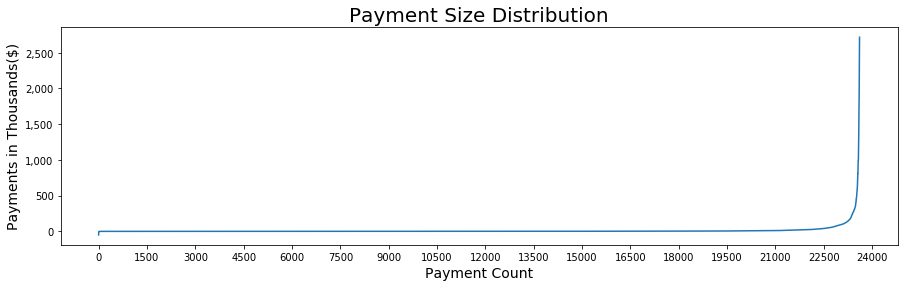

In [229]:
plt.figure(figsize=(15, 4))

ax = sns.lineplot(x=vendor_payments.index, \
                  y="PaymentAmount", \
                  data=vendor_payments.sort_values(by='PaymentAmount', ascending=True).reset_index())

plt.title("Payment Size Distribution",fontsize=20)
plt.xlabel("Payment Count",fontsize=14)
plt.ylabel("Payments in Thousands($)",fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1500))

## Fund Analysis

In [104]:
fund_payments = vendor_payments \
    .groupby(['FundDescription'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False).head(15) \
    .apply(lambda x: int(x)) \
    .head(15)

# I would like to be able to format with $ sign and commas, however this converts it to
# a data type that can't be aggregated in the bar chart below.
# is there a way to get around this?
#     .apply(lambda x: "${:,.0f}".format(x))

fund_payments

FundDescription
GENERAL                              44507852
WATER                                33524119
BENEFITS SELF INSURANCE              31977066
CIP AIRPORT                          18602434
CIP WATER                            15878392
TRANSPORTATION                       14885857
TOURISM DEVELOPMENT                  14175547
CIP WATER RECLAMATION                13231773
CIP TRANSPORTATION PRIVILEGE TAX     12622688
CIP GENERAL                          11481031
WATER RECLAMATION                    10422529
FLEET MANAGEMENT                      9112504
CIP FEDERAL GRANTS                    8931516
2017A MPC BONDS-WATER                 7339598
SOLID WASTE MANAGEMENT                4509578
Name: PaymentAmount, dtype: int64

In [96]:
# type(fund_payments)
fund_payments.dtypes

dtype('float64')

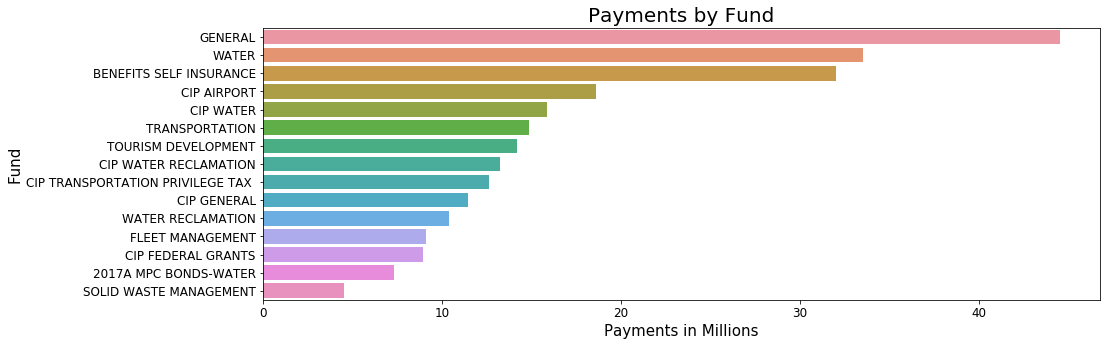

In [92]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(fund_payments.values, fund_payments.index)
plt.title('Payments by Fund',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Fund',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [100]:
fund_payments_mean = vendor_payments \
    .groupby(['FundDescription'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)


fund_payments_mean

FundDescription
CIP AIRPORT                            229659
HOME                                   184819
2017A MPC BONDS-WATER                  156161
2017B MPC BONDS AVIATION               152690
2017A MPC BONDS-WATER DF               135006
CIP FEDERAL GRANTS                     129442
WATER DEVELOPMENT                      128109
BENEFITS SELF INSURANCE                125893
2015 GO BOND Q4-STREET PAVEMT REHAB    111624
CIP RWDS                                99474
CIP FLOOD CNTRL DISTRCT CONTRIB/IGA     93698
CIP STADIUM IMPROVEMENT IGA             68916
2015 GO BONDS Q5-PUBLIC SAFETY-FIRE     60332
CIP SRP MARICOPA INDIAN COM CONTRIB     58453
TOURISM DEVELOPMENT                     56476
Name: PaymentAmount, dtype: int64

In [101]:
fund_payments_mean.dtypes

dtype('int64')

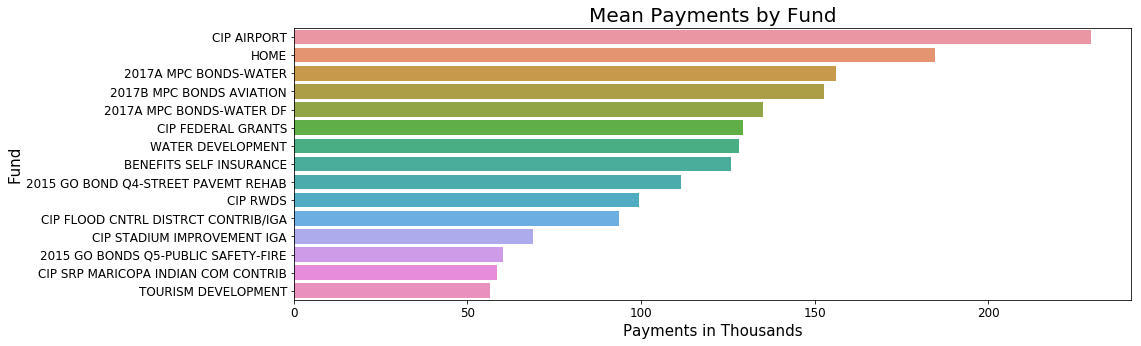

In [110]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(fund_payments_mean.values, fund_payments_mean.index)
plt.title('Mean Payments by Fund',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Fund',fontsize=15)
plt.xlabel('Payments in Thousands',fontsize=15)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

## Cost Center Analysis

In [105]:
center_payments = vendor_payments \
    .groupby(['CenterName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)

center_payments

CenterName
CIGNA OAP IN-NETWORK                   23013387
CAP TREATMENT PLANT                    18780287
AIRPORT TERMINAL AREA RDVLOPMENT PR    18515382
DESTINATION MARKETING CONTRACT          9879556
VEHICLE ACQUISITIONS                    7181229
BOOSTER STATIONS                        5855296
FLW 24 TRANS MAIN & BOOSTER MOD         4743386
CIGNA OAP                               4690873
PAVEMENT OVERLAY PROGRAM                4608992
CULTURAL COUNCIL CONTRACT               4576580
ASPHALT & MAINTENANCE                   4560945
WASTEWATER COLLECTION SYSTEM IMPROV     4464733
WATER TREATMENT FACILITY IMPR           4321891
DATA CENTER RESILIENCY PLAN             4052343
UTILITIES                               3909870
Name: PaymentAmount, dtype: int64

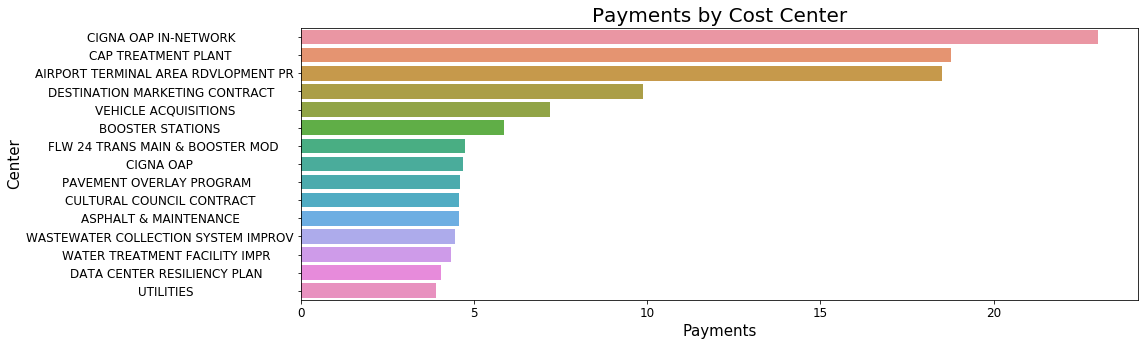

In [47]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(center_payments.values, center_payments.index)
plt.title('Payments by Cost Center',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Center',fontsize=15)
plt.xlabel('Payments',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

plt.tick_params(labelsize=12)

In [107]:
center_payments_mean = vendor_payments \
    .groupby(['CenterName'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)
    
center_payments_mean

CenterName
APS RAINTREE ID I-6002                 1021050
POLICE PORT & VHCL RADIO REP            991027
TRANSIT BUS PURCHASES-X109              847146
DESTINATION MARKETING CONTRACT          759965
CULTURAL COUNCIL CONTRACT               508508
CIGNA OAP IN-NETWORK                    479445
TRANSIT BUS PURCHASES                   321205
SROG WW TREATMENT PLANT IMP             305398
AIRPORT TERMINAL AREA RDVLOPMENT PR     280536
WATER TREATMENT PLANT MEMBRANES         258517
SWG FRNCHSE CAPTL RECOVERY FEE          250740
FLW 24 TRANS MAIN & BOOSTER MOD         215608
SROG TRANSMISSION LINE                  198718
DOWNTOWN MARSHALL WAY L & EO *10/17     190502
RECONSTRUCT TAXIWAY A AND EXITS         189640
Name: PaymentAmount, dtype: int64

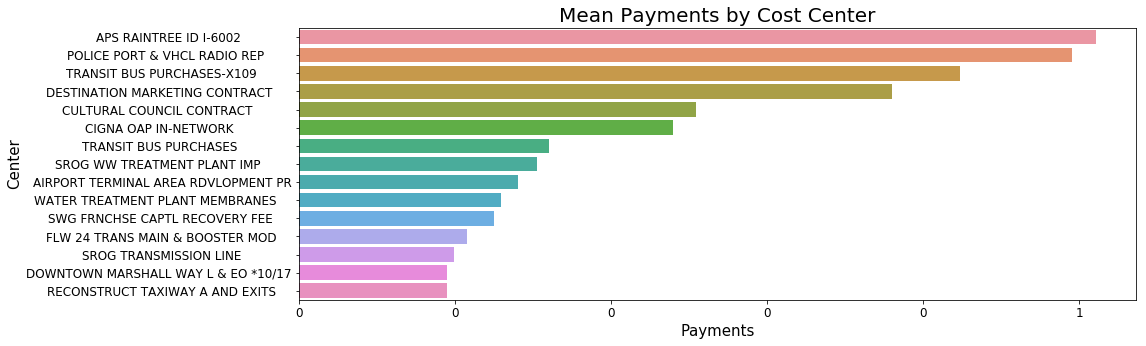

In [109]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(center_payments_mean.values, center_payments_mean.index)
plt.title('Mean Payments by Cost Center',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Center',fontsize=15)
plt.xlabel('Payments',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

plt.tick_params(labelsize=12)

## Account Analysis

In [126]:
account_payments = vendor_payments \
    .groupby(['AccountName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .reset_index() \
    .head(15)

account_payments

,AccountName,PaymentAmount
0,MEDICAL CLAIMS,29812330
1,ELECTRIC,19573764
2,CONT - BUILDINGS,19287362
3,PURCHASED WATER,14856617
4,CONT - STREETS,13525350
5,CONT - WATER - DISTRIBUTION SYSTEM,11474641
6,CONT - OTHER,10400798
7,DESTINATION MARKETING CONTRACT,9879556
8,MOTOR VEHICLES,7085677
9,OTHER PROFESSIONAL SERVICES,6237781


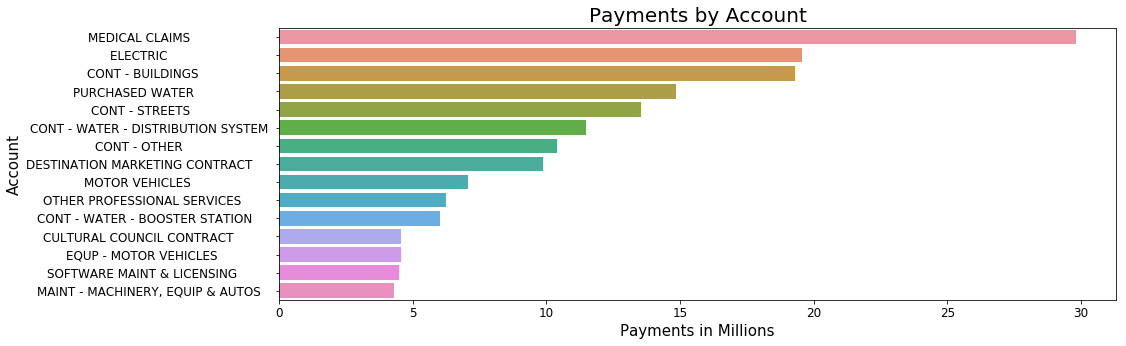

In [52]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(account_payments.values, account_payments.index)
plt.title('Payments by Account',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Account',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [112]:
account_payments_mean = vendor_payments \
    .groupby(['AccountName'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)

account_payments_mean

AccountName
EQUP - RADIOS                          991027
BLDG - BLDG/PURCH BGT USE ONLY         971355
DESTINATION MARKETING CONTRACT         759965
CULTURAL COUNCIL CONTRACT              508508
EQUP - MOTOR VEHICLES                  508381
MEDICAL CLAIMS                         350733
PURCHASED WATER                        316098
PURCHASING CARD EXPENSE                291392
FIRE SERVICE CONTRACTS                 249768
TREATMENT FILTER MEDIA                 215948
STREET OVERLAY                         191373
CONT - BUILDINGS                       175339
PHOENIX TRANSIT CONTRACTS              172550
CONT - WATER - DISTRIBUTION SYSTEM     136602
IT - LICENSES & OTHER FEES             135999
Name: PaymentAmount, dtype: int64

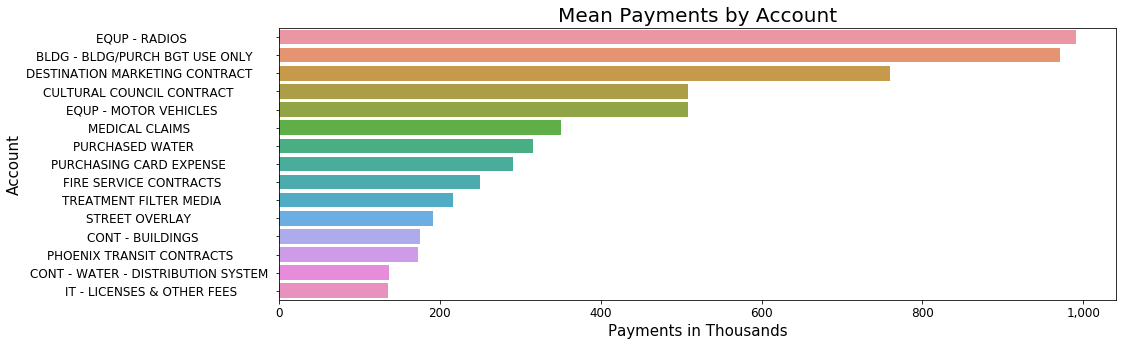

In [117]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(account_payments_mean.values, account_payments_mean.index)
plt.title('Mean Payments by Account',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Account',fontsize=15)
plt.xlabel('Payments in Thousands',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

# Vendor Name Analysis

### Which Vendors are being paid the most?  And at what times of the year?

In [177]:
vendor_analysis = vendor_payments \
    .groupby(['VendorName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .reset_index()
    
vendor_analysis.head(10)

,VendorName,PaymentAmount
0,CIGNA HEALTHCARE,31176352
1,APS,19863683
2,JE DUNN CONSTRUCTION COMPANY,17107677
3,CENTRAL ARIZONA PROJECT,14645247
4,MGC CONTRACTORS INC,13886155
5,SCOTTSDALE CONVENTION & VISITORS BUREAU,10044495
6,CITY OF PHOENIX,8428397
7,HUNTER CONTRACTING CO,6461100
8,M R TANNER CONSTRUCTION,6063651
9,SCOTTSDALE CULTURAL COUNCIL,5864866


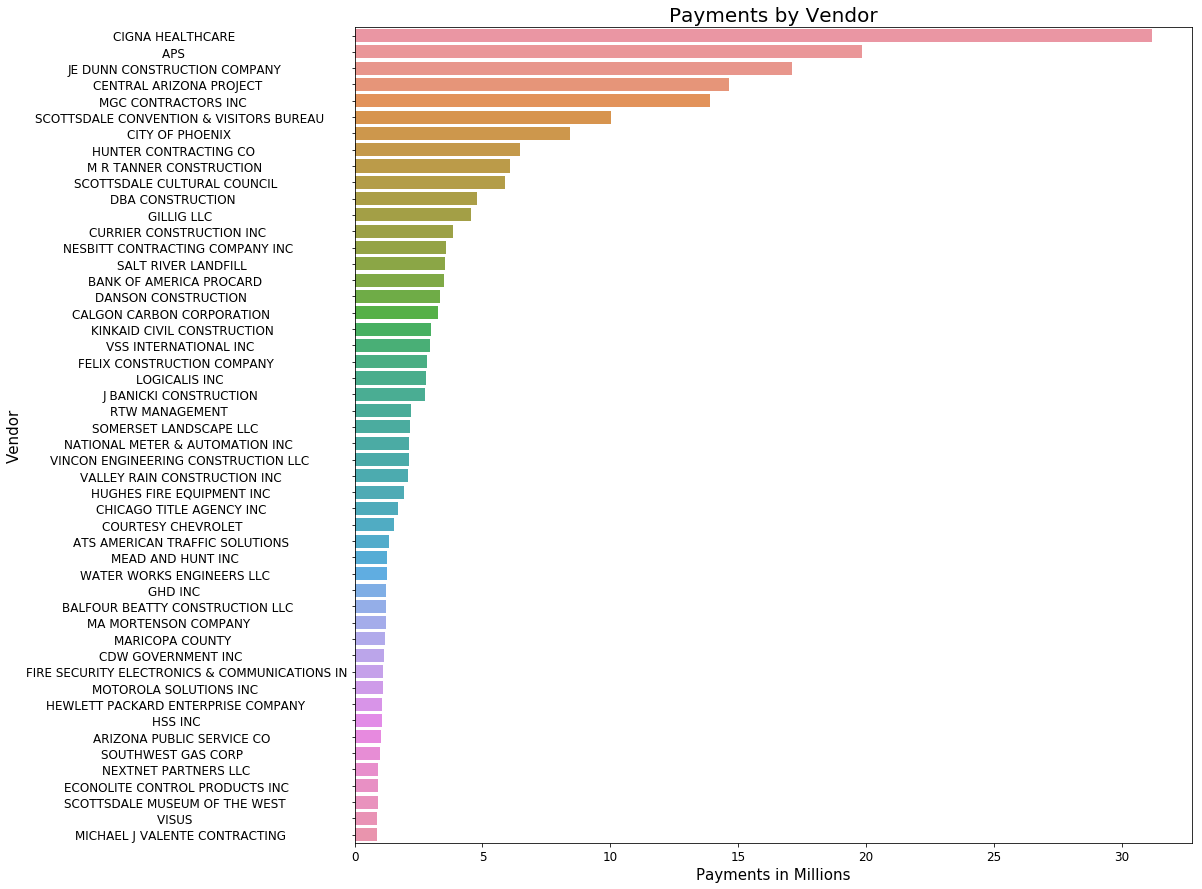

In [190]:
plt.rcParams["figure.figsize"] = [15, 15]

ax = sns.barplot(vendor_analysis.iloc[:,1].head(50),vendor_analysis.iloc[:,0].head(50))
plt.title('Payments by Vendor',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Vendor',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [178]:
# account_payments['AccountName'].to_frame().head()
vendor_analysis.iloc[:,0].to_frame().head()

,VendorName
0,CIGNA HEALTHCARE
1,APS
2,JE DUNN CONSTRUCTION COMPANY
3,CENTRAL ARIZONA PROJECT
4,MGC CONTRACTORS INC


In [166]:
top_vendors = pd.merge(vendor_analysis.iloc[:,0].to_frame().head(), vendor_payments, on=['VendorName'])
top_vendors.head()

,VendorName,PaymentDate,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month
0,CIGNA HEALTHCARE,2017-08-30,2368262.77,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,MEDICAL CLAIMS,2018,2,8
1,CIGNA HEALTHCARE,2017-08-30,467957.07,715,BENEFITS SELF INSURANCE,27438,CIGNA OAP,52411,MEDICAL CLAIMS,2018,2,8
2,CIGNA HEALTHCARE,2017-08-30,75908.96,715,BENEFITS SELF INSURANCE,27439,CIGNA OAP HSA,52411,MEDICAL CLAIMS,2018,2,8
3,CIGNA HEALTHCARE,2017-08-30,145056.15,715,BENEFITS SELF INSURANCE,27453,CIGNA PPO DENTAL,52410,DENTAL CLAIMS,2018,2,8
4,CIGNA HEALTHCARE,2017-08-30,106161.01,715,BENEFITS SELF INSURANCE,27454,CIGNA LOC PLUS IN-NETWRK,52411,MEDICAL CLAIMS,2018,2,8


In [168]:
top_vendors_monthly = top_vendors \
    .groupby(['Month','VendorName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .reset_index()

top_vendors_monthly.shape

(59, 3)

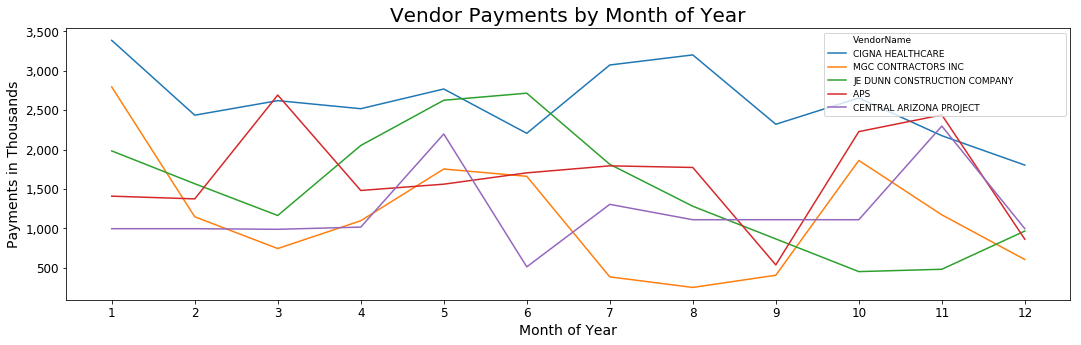

In [169]:
plt.rcParams["figure.figsize"] = [18, 5]

ax = sns.lineplot(x="Month", \
                  y="PaymentAmount", \
                  hue="VendorName", \
                  data=top_vendors_monthly)

plt.title("Vendor Payments by Month of Year",fontsize=20)
plt.xlabel("Month of Year",fontsize=14)
plt.ylabel("Payments in Thousands",fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(fontsize=9)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

# Payment Frequency Throughout The Year

In [83]:
account_payments_month = vendor_payments \
    .groupby(['Month'])['PaymentAmount'] \
    .sum() \
    .reset_index() 
   
account_payments_month

,Month,PaymentAmount
0,1,24807941.09
1,2,22644035.89
2,3,21600046.09
3,4,24666969.77
4,5,26209035.86
5,6,26232085.73
6,7,28584890.50
7,8,22356200.28
8,9,18977599.39
9,10,27377901.03


No handles with labels found to put in legend.


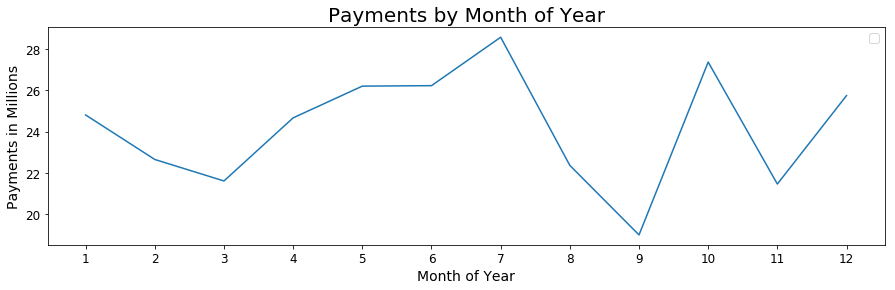

In [94]:
plt.rcParams["figure.figsize"] = [15, 4]

# ax = sns.barplot(account_payments_month.index, account_payments_month.values)

ax = sns.lineplot(x="Month", \
                  y="PaymentAmount", \
                  data=account_payments_month)

plt.title("Payments by Month of Year",fontsize=20)
plt.xlabel("Month of Year",fontsize=14)
plt.ylabel("Payments in Millions",fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

In [143]:
# how do payments for only the top 5 accounts by spending track accross the year?
# I need to find only data for the top 5 accounts by spending

# selecting only AccountName produces a series, which I can't use to merge
# the to_frame function allows me to convert the series to a dataframe, which I can use to do my merge
account_payments['AccountName'].to_frame().head()

,AccountName
0,MEDICAL CLAIMS
1,ELECTRIC
2,CONT - BUILDINGS
3,PURCHASED WATER
4,CONT - STREETS


In [146]:
#subselect only data for the top 5 accounts by spending
top_5_accts = pd.merge(account_payments['AccountName'].to_frame().head(), vendor_payments, on=['AccountName'])
top_5_accts.head()

,AccountName,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,FiscalYear,AccountingPeriod,Month
0,MEDICAL CLAIMS,2017-08-30,CIGNA HEALTHCARE,2368262.77,715,BENEFITS SELF INSURANCE,27437,CIGNA OAP IN-NETWORK,52411,2018,2,8
1,MEDICAL CLAIMS,2017-08-30,CIGNA HEALTHCARE,467957.07,715,BENEFITS SELF INSURANCE,27438,CIGNA OAP,52411,2018,2,8
2,MEDICAL CLAIMS,2017-08-30,CIGNA HEALTHCARE,75908.96,715,BENEFITS SELF INSURANCE,27439,CIGNA OAP HSA,52411,2018,2,8
3,MEDICAL CLAIMS,2017-08-30,CIGNA HEALTHCARE,106161.01,715,BENEFITS SELF INSURANCE,27454,CIGNA LOC PLUS IN-NETWRK,52411,2018,2,8
4,MEDICAL CLAIMS,2017-08-30,CIGNA HEALTHCARE,9481.05,717,BENEFITS SELF INS DIS PSPRS RETIREE,27450,CIGNA OAP IN-NETWORK PSPRS RETIREES,52411,2018,2,8


In [148]:
top_5_accts_monthly = top_5_accts \
    .groupby(['Month','AccountName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .reset_index()

top_5_accts_monthly.shape

(60, 3)

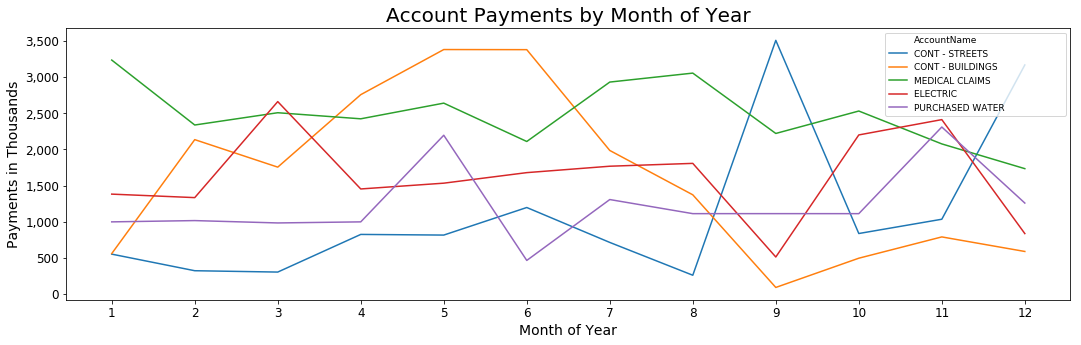

In [150]:
plt.rcParams["figure.figsize"] = [18, 5]

ax = sns.lineplot(x="Month", \
                  y="PaymentAmount", \
                  hue="AccountName", \
                  data=top_5_accts_monthly)

plt.title("Account Payments by Month of Year",fontsize=20)
plt.xlabel("Month of Year",fontsize=14)
plt.ylabel("Payments in Thousands",fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(fontsize=9)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())